# Lab 4: Fuzzy Foundations & Visualisation

**Module:** Artificial Intelligence  
**Topic:** Fuzzy Logic – Part 1  

---

## Learning Objectives

By the end of this lab, you will be able to:

1. **Define and plot common membership functions**  
    - Triangular  
    - Trapezoidal  
    - Gaussian  
    - Sigmoid

2. **Compute membership degrees for crisp inputs**

3. **Implement fuzzy hedges from scratch and visualise their effect on membership functions**

4. **Apply fuzzy set operations:**  
    - AND (min)  
    - OR (max)  
    - NOT (complement)  
    - Probabilistic OR

5. **Fuzzify crisp inputs for the dapping example**

## Setup

Run the cell below to import the required libraries.  
We use **scikit-fuzzy** for its convenient membership function generators and **matplotlib** for plotting.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Crisp Sets vs. Fuzzy Sets

In classical (Boolean) set theory, an element either belongs to a set or it doesn't. The characteristic function of a crisp set **A** maps elements from a universe of discourse **X** to \{0, 1\}:

$$
f_A(x) : X \to \{0,1\}, \qquad
f_A(x) =
\begin{cases}
1 & if & x \in A,\\[6pt]
0 & if & x \notin A.
\end{cases}
$$

A fuzzy set generalises this by allowing partial membership. The membership function $\mu_A(x)$ maps elements to the continuous range $[0,1]$:

$$
\mu_A(x) : X \to [0,1].
$$

The universe of discourse is the range of all possible values for a chosen variable (for example, human height in cm).

# Exercise 1.1: Crisp vs. Fuzzy Tallness

The slides show crisp and fuzzy sets for tallness. The universe of discourse for height ranges from 150 cm  
to 210 cm.

Task: Plot a crisp set where "tall" means height ≥ 180 cm (Boolean boundary), and then plot a fuzzy  
version where tallness is a gradual transition. Use the following triangular fuzzy sets:

- Short: Triangle(150, 150, 175)  
- Average: Triangle(160, 175, 190)  
- Tall: Triangle(180, 200, 210)

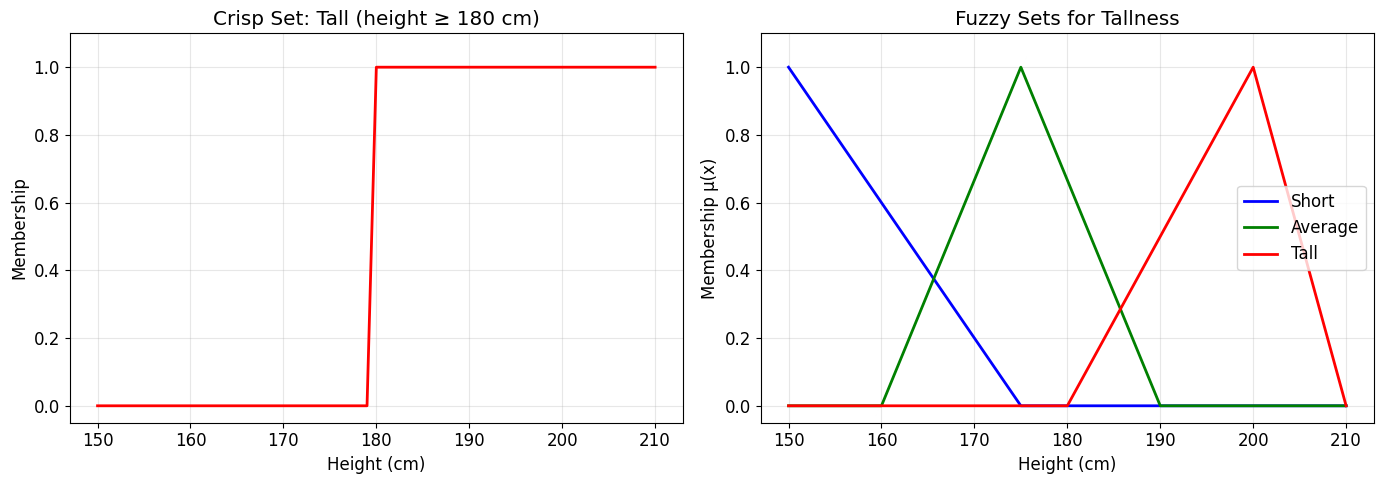

A person who is 184 cm tall:
 μ_average(184) = 0.40
 μ_tall(184) = 0.20
 → Partial membership in MULTIPLE sets simultaneously.


In [2]:
# Universe of discourse: height in cm
x_height = np.arange(150, 211, 1)

# --- Crisp set: tall if height >= 180 ---
crisp_tall = np.where(x_height >= 180, 1.0, 0.0)

# --- Fuzzy sets ---
short = fuzz.trimf(x_height, [150, 150, 175])

# TODO: create here the "average" and "tall" sets

# Average
average = fuzz.trimf(x_height, [160, 175, 190])

# Tall
tall = fuzz.trimf(x_height, [180, 200, 210])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crisp
ax1.plot(x_height, crisp_tall, 'r-', linewidth=2)
ax1.set_title('Crisp Set: Tall (height ≥ 180 cm)')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Membership')
ax1.set_ylim(-0.05, 1.1)

# Fuzzy
ax2.plot(x_height, short, 'b-', linewidth=2, label='Short')
ax2.plot(x_height, average, 'g-', linewidth=2, label='Average')
ax2.plot(x_height, tall, 'r-', linewidth=2, label='Tall')
ax2.set_title('Fuzzy Sets for Tallness')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Membership μ(x)')
ax2.set_ylim(-0.05, 1.1)
ax2.legend()
plt.tight_layout()
plt.show()

# Demonstrate partial membership
height = 184
mu_avg = fuzz.interp_membership(x_height, average, height)

# TODO: compute here the membership value for "tall"
mu_tall = fuzz.interp_membership(x_height, tall, height)

print(f"A person who is {height} cm tall:")
print(f" μ_average({height}) = {mu_avg:.2f}")
print(f" μ_tall({height}) = {mu_tall:.2f}")
print(f" → Partial membership in MULTIPLE sets simultaneously.")